# Statistics


- [Pandas](#Pandas): Python's most important dataframing library
- [Tidiness and method chaining](#Tidiness-and-method-chaining)
- [Using scipy.stats for more advanced statistics](#Using-scipy.stats-for-more-advanced-statistics)
- [Statistical enrichment analysis](#Statistical-enrichment-analysis)
- [Statsmodels](#Statsmodels)
- [Differential Expression](#Differential-expression)



This chapter deals with statistics from a data analysis and numerical computation perspective, while the machine learning aspects are done later. As Python comes with battery included, it has its own [statistics functions](https://docs.python.org/3/library/statistics.html). Similarly, numpy offers the basic [statistical summaries][2] as part of its array functions. The [scikits](http://scikits.appspot.com/scikits) stack is useful for many research fields, many of which have their own statistics submodules. [PyMC3] will be presented in another chapter. Rpy2 module can also be useful for integrating R programs. As you can see, third party libraries present a lot of redundancies. This is a long time subject of dissagreements in the community. On top of everything, scikit-learn also has an implementation for [generalized linear models](http://scikit-learn.org/stable/modules/linear_model.html). So there isn't always an obvious wau of doing things, contrary to Python's Zen and prossibly influenced by R's byzantine approach to statistics.


[2]: https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.statistics.html

## Pandas

Languages developed primarily for statistics are using rich data structures that are available also in Python. One of the most important modules to use in Pandas. First have a look at [Pandas API][1]. Do you recognize some of these structures and can you name equivalent functionality from other languages like R or tabular computing programs like Excel? Pandas can do everything Excel does and then some more, like SQL interogation and advanced statistics through its scipy/numpy modules integration and matplotlib visualization. Moreover, for those with a background into R, Pandas has a similar synthax and can be used interchangeably with R in Python itself through the rpy2 module.

R related functionality:
- http://pandas.pydata.org/pandas-docs/dev/comparison_with_r.html
- http://pandas.pydata.org/pandas-docs/dev/r_interface.html

Main documentation entry points:
- https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html 


Next is a small hands-on introduction, with tips on creation, selection, filtering and grouping.

[1]: http://pandas.pydata.org/pandas-docs/dev/api.html

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

s = pd.Series([1, 9, 2, 10, np.nan, 6])
df1 = pd.DataFrame(np.random.randn(3,5),index=s[1:4],columns=list('ABCDF'))
df2 = pd.DataFrame({'number' : 1.,
                    'dates' : pd.date_range('20150720',periods=4),
                    'floats' : pd.Series(0.25,index=list(range(4)),dtype='float32'),
                    'integers' : np.array([3] * 4,dtype='int32'),
                    'cathegories' : pd.Categorical(["test","train","test","train"]),
                    'string' : 'foo' })

print(df2)
print(type(df2.values))

   number      dates  floats  integers cathegories string
0     1.0 2015-07-20    0.25         3        test    foo
1     1.0 2015-07-21    0.25         3       train    foo
2     1.0 2015-07-22    0.25         3        test    foo
3     1.0 2015-07-23    0.25         3       train    foo
<class 'numpy.ndarray'>


In [6]:
df1.sort_values(by='B')

,A,B,C,D,F
2.0,-0.179413,0.175344,-0.853393,0.058743,-0.928096
10.0,-0.562923,0.427126,-0.606615,-0.314992,0.499882
9.0,-1.116116,1.048214,-0.829268,-0.450177,2.937480


In [5]:
# Description

print(df2.dtypes)
#try tab completion, column labels can be easily retrieved
#df2.
df2.head(2)
df1.describe()
df1.T
#sort by axis
#print(df1.sort_index(axis=0, ascending=False))
#sort by values
#print(df1.sort(columns='B'))

number                float64
dates          datetime64[ns]
floats                float32
integers                int32
cathegories          category
string                 object
dtype: object


,9.0,2.0,10.0
A,-0.787454,-0.765480,-2.033847
B,-0.190877,0.261963,0.150793
C,0.594649,0.856377,0.195765
D,-0.635522,0.273237,-0.563028
F,0.304887,-1.044408,0.874286


In [13]:
# Selection and slicing. And filtering.
df1 = pd.DataFrame(np.random.randn(3,5),index=s[1:4],columns=list('ABCDF'))
# selection by labels
#df1
#df1['A']
#df1.A
#print(df1[0:2])
df1.loc[2:10,['A','B']]
#print df1.loc[2,'A']

,A,B
2.0,0.776222,1.519814
10.0,0.385811,0.044610


In [23]:
df1.loc[2:10,['A','B']]

,A,B
2,-0.679790,-1.774782
10,0.761237,-0.367952


In [19]:
# selection by position
#df1
#df1.iloc[2]
#df1.iloc[0:2,0:3]
#df1.iloc[[1,2,],[0,2]]
print(df1)
df1.iloc[1,1]

             A         B         C         D         F
9.0   1.489061  0.233563 -1.425374 -1.935047  0.314065
2.0   0.776222  1.519814 -0.838998  0.398798 -1.709546
10.0  0.385811  0.044610 -1.041533  1.266857  1.133820


1.5198138664523637

In [21]:
# filter by boolean test
#print df1
#print df1[df1.A > 0.1]
#print df1[df1 > 0.1]
print(df1[(df1['A'] > 0.1) & (df1['B']>0.2)])

            A         B         C         D         F
9.0  1.489061  0.233563 -1.425374 -1.935047  0.314065
2.0  0.776222  1.519814 -0.838998  0.398798 -1.709546


In [22]:
s = pd.Series([1, 9, 2, 10, np.nan, 6])
df1 = pd.DataFrame(np.random.randn(3,5),index=s[1:4],columns=list('ABCDF'))
# filter by values
df3 = df1.copy()
df3['mask']=['one','one','two']
df3['test'] = [1, 2, 3]
print(df3)
print(df3[df3['mask'].isin(['one'])])
#df1.dropna()

df1['test2'] = df3['test']
#print df1

             A         B         C         D         F mask  test
9.0   0.860532 -0.016485  2.227145  0.446174 -0.964432  one     1
2.0   0.963801 -1.618940 -1.333987 -0.398223 -0.244665  one     2
10.0 -0.766295 -1.518846  1.198762 -0.071410 -0.568117  two     3
            A         B         C         D         F mask  test
9.0  0.860532 -0.016485  2.227145  0.446174 -0.964432  one     1
2.0  0.963801 -1.618940 -1.333987 -0.398223 -0.244665  one     2


In [31]:
# Setting values by label, position and numpy array

df1.loc[:,'A'] = 0
df1.iat[0,1] = 5
df1.loc[:,'D'] = np.array([10] * len(df1))
print df1

    A         B         C   D         F
9   0  5.000000  0.659238  10  0.268067
2   0  0.068065  0.537079  10 -0.930164
10  0  0.277067 -0.435075  10  0.519541


In [41]:
# Categories and grouping
s = pd.Series([1, 9, 2, 10, np.nan, 6])
df1 = pd.DataFrame(np.random.randn(3,5),index=s[1:4],columns=list('ABCDF'))
df3 = df1.copy()
df3['mask']=['one', 'one','two']
df3["vtype"] = df3["mask"].astype("category")
print df3
print df3["vtype"]
df3["vtype"].cat.categories = ["nice", "nasty"]
print df3
print df3.groupby("vtype").size()

           A         B         C         D         F mask vtype
9  -0.969339 -1.247162 -0.172333 -1.604282 -0.720619  one   one
2  -1.096683  0.984533  0.228007  1.707215  0.884176  one   one
10 -0.208973 -0.147277 -0.031264 -0.524877 -0.172902  two   two
9     one
2     one
10    two
Name: vtype, dtype: category
Categories (2, object): [one < two]
           A         B         C         D         F mask  vtype
9  -0.969339 -1.247162 -0.172333 -1.604282 -0.720619  one   nice
2  -1.096683  0.984533  0.228007  1.707215  0.884176  one   nice
10 -0.208973 -0.147277 -0.031264 -0.524877 -0.172902  two  nasty
vtype
nice     2
nasty    1
dtype: int64


In [28]:
# Basic operations
s = pd.Series([1, 9, 2, 10, np.nan, 6])
df1 = pd.DataFrame(np.random.randn(3,5),index=s[1:4],columns=list('ABCDF'))
df1['diff'] = df1.A - df1.B
df1['A'].map(lambda x : 10 * x)
print df1.applymap(np.sqrt)
print df1.apply(np.sqrt, axis = 1)
print df1.apply(np.sum, axis = 1)

           A         B         C         D        F      diff
9   0.866943  0.542561  1.018572       NaN      NaN  0.676178
2   0.643135  0.705118  0.953981  0.264569      NaN       NaN
10  1.205045  1.545023       NaN       NaN  0.55412       NaN
           A         B         C         D        F      diff
9   0.866943  0.542561  1.018572       NaN      NaN  0.676178
2   0.643135  0.705118  0.953981  0.264569      NaN       NaN
10  1.205045  1.545023       NaN       NaN  0.55412       NaN
9    -0.499315
2     1.365650
10    1.990501
dtype: float64


Task:
- Write a function to create a dataframe out of this gene dictionary below, using the name as an index.
- Remove genes having undefined expression.
- Add a "seq_quality" column what will place an additional "yes/no" mask to genes whose read counts are above 1.
- Filter out genes that fail on both the qualify and seq quality.

For the finer points, try to be as short as possible! Lots of code makes room for errors and it is hard to read/reproduce.

In [2]:
import numpy as np

gene_table = {'name': ["G"+str(i) for i in range(10)],
'expression': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
'read_counts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}


## Tidiness and method chaining

As data science became a thing and armies of analists entered the workforce, python and r dataframes developed two new concepts. Tidiness was a [well known concept][1] to database programmers, but data scientists were either inexperienced programmers or people from other backgrounds who started to program.

Tidiness rules are as follows:
- Each variable forms a column
- Each observation forms a row
- Each type of observational unit forms a table

The general idea is that when working with input data you should not use the garbled mess in which the data is at first loaded. Instead you should extract the pieces of information that are needed for your study, and multiple types of observational units must form different dataframes. Why is this so important after all? Because computers are not statisticians, the dataframe concept is unnatural to them. What they can work much better with are memory addresses and values. Having a tidy dataframe eases their work, and it affects reproducibility as well! Getting to a tidy format early on is also useful to separate data munging from data analysis, leading to a cleaner and faster workflow.

While tidiness has to do with data, the second concept of method chaining has to do with a cleaner syntax. The best way to understand how that works is by using the task completed above on following template:

[1]: https://en.wikipedia.org/wiki/First_normal_form

In [ ]:
import pandas as pd

def proccess(dict):
    df = (pd.Dataframe()
            .pipe(create_matrix)
            .pipe(rem_undefined)
            .pipe(add_seq_quality)
            .pipe(filter_qualify_seq_quality))    
    return df

def create_matrix(df, d=None):
    return df

def rem_undefined(df):
    return df

def add_seq_quality(df):
    return df

def filter_qualify_seq_quality(df):
    return df

df = proccess(gene_table)
df

Now, if some of your functions contain a single instruction that doesn't require a lot of coding you can actually replace the pipeline function with the dataframe function itself. This is recommended for readability. Try it!

## Using scipy.stats for more advanced statistics

SciPy is one of the most popular scientific computing libraries for Python. It is part of the so called "NumPy stack" of modules for scientific computing, along with NumPy, SymPy, Matplotlib and Pandas. SciPy does much more than just statistics, one could view it as a free and arguably more popular alternative to MatLab, one of the private scientific computing environments. Scipy can do pretty much anything that needs numerical computing, but in this chapter we will only use it for statistics.

**T-test**

One of the basic application of statistics is testing if a null hypothesis is true. In the previous application of Pandas for gene expression studies we observed that the data was normalized, with its averages matching closely. Suppose we want to know if in statistical terms these averages are matching sufficiently close. A simple way to check this is to compute all pair t-tests and see of all our obtained P - values are falling under the 0.005 bar.

http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html


          GeneID  GSM21712  GSM21713  GSM21714  GSM21715  GSM21716  GSM21718
ID                                                                          
1007_s_at    780  7.002916  7.018323  6.742437  6.725877  7.051872  6.883046
1053_at     5982  5.912374  5.905245  5.678275  5.765487  5.652194  5.845824
117_at      3310  4.623223  4.572847  4.841309  4.319575  4.489222  4.573047
121_at      7849  7.619362  7.573693  7.405601  7.552200  7.675400  7.223818
[[  0.00e+00   4.55e-06   7.28e-09   5.75e-16   2.26e-03   7.81e-06]
 [  4.55e-06   0.00e+00   2.54e-01   4.74e-04   1.33e-01   9.50e-01]
 [  7.28e-09   2.54e-01   0.00e+00   1.66e-02   7.92e-03   2.34e-01]
 [  5.75e-16   4.74e-04   1.66e-02   0.00e+00   6.26e-07   4.32e-04]
 [  2.26e-03   1.33e-01   7.92e-03   6.26e-07   0.00e+00   1.54e-01]
 [  7.81e-06   9.50e-01   2.34e-01   4.32e-04   1.54e-01   0.00e+00]]


/home/sergiun/programs/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:33: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x7fcf2ddc7390>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcf2dd5ae10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcf2dd60f98>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcf2dd60780>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcf2ddc7da0>,
  <matplotlib.lines.Line2D at 0x7fcf2dd38d68>]}

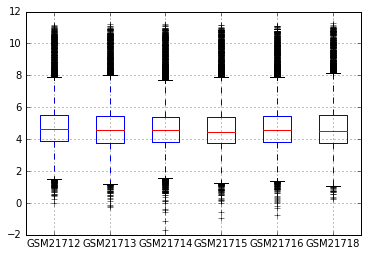

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('data/gex.txt', sep = '\t', index_col = 0)
print(df.head(4))
#df.iloc[:,1:].astype(float)
#print df.dtypes
#print type(df.GSM21712.values)

pmatrix = np.zeros((6,6))# the P-value matrix
i = -1
for ci in df.columns[1:]:
    i += 1
    a = df[ci].values
    a = a[~np.isnan(a)]#Removing undefined elements
    #a = df[ci].values.astype(float)
    #print a.dtype, type(a[0])
    j = -1
    for cj in df.columns[1:]:
        j += 1
        if ci == cj: continue
        b = df[cj].values
        b = b[~np.isnan(b)]
        t, p = stats.ttest_ind(a, b, equal_var = False)
        #print np.isnan(a).any(), np.isnan(b).any()
        pmatrix[i,j]=p

np.set_printoptions(linewidth=200)
np.set_printoptions(precision=2)
print(pmatrix)
df.boxplot()

**ANOVA**

.. But, in order not to get incidentally murdered by a reviewer with background in statistics, one should use a single test to rule them all, popularly called ANOVA.


In [45]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('data/gex.txt', sep = '\t', index_col = 0)

sl = [] #sample list
for ci in df.columns[1:]:
    a = df[ci].values
    a = a[~np.isnan(a)]#Removing undefined elements
    sl.append(a)

print stats.f_oneway(*sl)

(14.440905160749136, 3.5930324483772904e-14)


**Linear regression**

Ever felt the need to fit a straight trendline to a number of points in a scatter plot? This is called linear regression. Here is how you can do LR with numpy. As a useful exercise, let us generate our own dataset.

How is the line fitted? The most basic methodology is least square minimization of the squared standard error. One can do least square fitting directly in numpy or scikit-learn to obtain the same results.

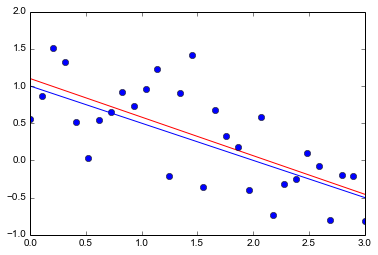

In [46]:
%matplotlib inline

import numpy as np
import pylab as plt
from scipy import stats

nsamp = 30
x = np.linspace(0, 3, nsamp)
y = -0.5*x + 1 #next line randomizes these aligned datapoints
yr = y + .5*np.random.normal(size=nsamp)

slope, intercept, r_value, p_value, std_err = stats.linregress(x,yr)
line = slope*x+intercept

plt.plot(x,line,'r-', x,yr,'o', x,y,'b-')

**Curve fitting and parameter estimation**

TODO: moved to the new optimization chapter!

When the data points are multidimensional you will use more complex multivariate regression techniques, but we will discuss that at more length in the machine learning chapter. For the moment, let us use a similar exercise as before, but fit a curve instead. While not strictly statistics related, this exercise can be useful for example if we want to decide how a probability distribution fits our data. We will use the least-square again, through the optimization module of scipy.

Optimization terminated successfully.
         Current function value: 8.982230
         Iterations: 62
         Function evaluations: 119
estimated vs real [  0.53854206  20.28753117] (1, 20)


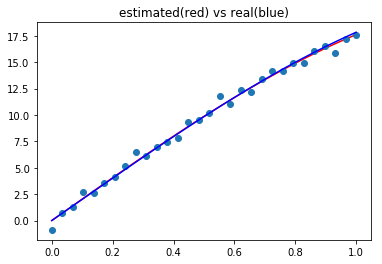

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
from scipy import optimize

nsamp = 30
x = np.linspace(0,1,nsamp)
"""
y = -0.5*x**2 + 7*sin(x)
This is what we try to fit against. Suppose we know our function is generated
by this law and want to find the (-0.5, 7) parameters. Alternatively we might
not know anything about this dataset but just want to fit this curve to it.
"""

f = lambda p, x: p[0]*x*x + p[1]*np.sin(x)
#Exercise: define a normal Python function f() instead!

testp = (1, 20)
y = f(testp,x)
yr = y + .5*np.random.normal(size=nsamp)

e = lambda p, x, y: (abs((f(p,x)-y))).sum()

p0 = (5, 20) # initial parameter value

p = optimize.fmin(e, p0, args=(x,yr))
yp = f(p,x) # predicted target

print("estimated vs real", p, testp)
plt.title("estimated(red) vs real(blue)")
plt.plot(x,yp,'r-', x,yr,'o', x,y,'b-')


### Statistical enrichment analysis

**What is enrichment?**
Before we move on, we should get back to something that is always obsessing biologists with data: putting a P-value on your findings. If all you have is a series of numbers of a series of series it may be that the T-tests and ANOVA will be quite good, but what if you have cathegorical data, as many times it happens in biology? What if the question is "I have a bag of vegetables, to which of the following vegetable racks is my bag belonging more?". If the answer also takes into account how many items each of the vegetable racks is holding then you can sove it with statistical enrichment testing. Of course no one at this course will argue with your shopping habits if you don't think the number of vegies on a store racks is important! As there are many cathegorical sets of functional annotations in biology, we will only focus on [Gene Ontology](http://geneontology.org/)

**Gene Ontology**
To use the GO annotations we typically need to know if the genes/protein of a specific organism are annotated with a certain GO label (GO id), while concurrent labels are possible for every gene/protein since each can have multiple roles in biology. The annotations are structured in a tree, with the branches having inherited all annotations from the leafs. You can read more about it [here](http://en.wikipedia.org/wiki/Gene_ontology).

Extra task: Download raw annotation files and program your own Python GO module. One key aspect is annotations must be inherited through the tree. The elegant way to achieve the tree traversal is using a recursive function. This is a hard task, that needs hours to complete but it can be very instructive.

For the purpose of this course in order to parse the GO annotations we will use a Python library called [Orange](http://pythonhosted.org/Orange-Bioinformatics/index.html), that has other useful modules as well. Other alternatives are calling an R package from within Python (recomending [topGO](http://www.bioconductor.org/packages/release/bioc/html/topGO.html) for enrichment and GO.db for interogation) or if you are a Perl senior then call a BIO::Perl module. BioPython is also preparing a GO module so be sure to check their package once every couple of years.

**Enrichment test**

In the figure below you can see that there are four sets forming up when we intersect our custom set of genes with the annotation database. The purpose of the enrichment test is to tell how likely is the four sets overlap. To answer this a hypergeometric test is commonly used, known as Fischer's exact test. Let us put it into Python!

[http://en.wikipedia.org/wiki/Fisher%27s_exact_test](http://en.wikipedia.org/wiki/Fisher%27s_exact_test)

Note that multiple testing corrections like the [Bonferroni correction](http://en.wikipedia.org/wiki/Bonferroni_correction) must also be executed, but obtaining the raw P-values is sufficient for the purpose of this course.

TODO: use GOATOOLS
- https://www.nature.com/articles/s41598-018-28948-z
- https://github.com/tanghaibao/goatools


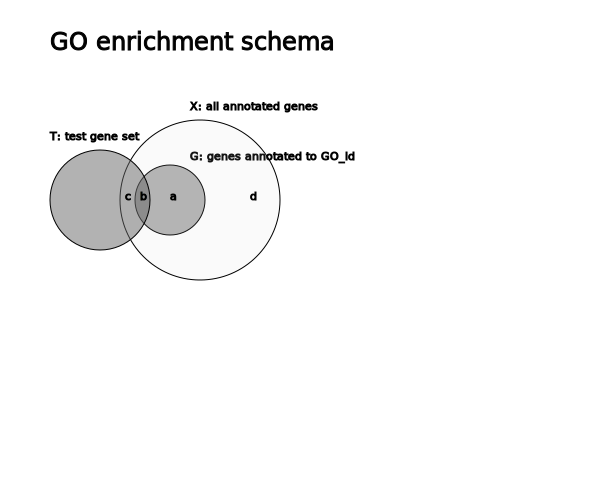

In [1]:
%run ./lib/svgoutput.py
"""
GO enrichment figure displayed using IPython's native SVG frontend
"""
scene = SVGScene(500,600)
scene.text((50,50),"GO enrichment schema")


scene.circle((170,200),35,(100,100,100), 0.5)
scene.text((190,160),"G: genes annotated to GO_id",size = 11)
scene.circle((200,200),80,(200,200,200), 0.1)
scene.text((190,110),"X: all annotated genes",size = 11)
scene.circle((100,200),50,(100,100,100), 0.5)
scene.text((50,140),"T: test gene set",size = 11)

scene.text((170,200),"a", size = 11)
scene.text((140,200),"b", size = 11)
scene.text((125,200),"c", size = 11)
scene.text((250,200),"d", size = 11)

scene

Perform the statistical test

                    In Set  Outside Set
        GOid ann.     b       a
    Not GOid ann.     c       d

Read the docs:
[http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html)


In [ ]:
"""
Using R to get the annotations and perform GO enrichment
TODO: not finished, only for reference
See here something similar:
http://bcb.io/2009/10/18/gene-ontology-analysis-with-python-and-bioconductor/
"""

import rpy2.robjects as robjects
def get_go_children(go_term, go_term_type):
    robjects.r('''
        library(GO.db)
    ''')
    child_map = robjects.r["GO%sCHILDREN" % (go_term_type)]
    children = []
    to_check = [go_term]
    while len(to_check) > 0:
        new_children = []
        for check_term in to_check:
            new_children.extend(list(robjects.r.get(check_term, child_map)))
        new_children = list(set([c for c in new_children if c]))
        children.extend(new_children)
        to_check = new_children
    children = list(set(children))
    return children

In [48]:
"""
Using Orange to get annotations
"""
from orangecontrib.bio import go
import sys

ontology = go.Ontology()
# Print names and definitions of all terms with "apoptosis" in the name
terms = [term for term in ontology.terms.values() if "apoptosis" in term.name.lower()]
#for term in terms: print term.id, term.name, term.def_
##Catch question: Why def_?
# Load annotations for yeast.
annotations = go.Annotations("sgd", ontology=ontology)

#Review: Object introspection
#print dir(annotations)
#print go.__file__
#print dir(annotations.get_all_annotations)
#print annotations.get_all_annotations.__doc__
#print dir(ontology.terms)
#print ontology.terms.values()[0]
#print annotations.get_annotated_terms.__doc__

go = {}
for term in ontology.terms.values():
    ants = annotations.get_all_annotations(term.id)
    gs = set([a.gene_name for a in ants])
    if len(gs)>0: go[term.id] = gs

print len(go)


        # res = annotations.get_enriched_terms(["YGR270W", "YIL075C", "YDL007W"])

# gene = annotations.alias_mapper["YIL075C"]
# print(gene + " (YIL075C) directly annotated to the following terms:")
# for a in annotations.gene_annotations[gene]:
#     print(ontology[a.GO_ID].name + " with evidence code " + a.Evidence_Code)

# # Get all genes annotated to the same terms as YIL075C
# ids = set([a.GO_ID for a in annotations.gene_annotations[gene]])
# for termid in ids:
#     ants = annotations.get_all_annotations(termid)
#     genes = set([a.DB_Object_Symbol for a in ants])
#     print(", ".join(genes) +" annotated to " + termid + " " + ontology[termid].name)


7886


Now we want to choose a set of genes to test enrichment, so we output a few terms together with their annotated genes:

In [ ]:
for gid in go:
    if len(go[gid])>5 and len(go[gid])<20:
        print gid, ontology[gid].name, go[gid]

In [49]:
testset = set(['KAR2', 'EGD1', 'EGD2', 'YBR137W', 'MDY2', 'SEC72', 'SGT2', 'SEC66', 'SEC61', 'SEC62', 'SEC63', 'LHS1', 'SSS1', 'BTT1', 'GET3', 'GET4'])
testGO = 'GO:0006620'# posttranslational protein targeting to membrane set

#testset = set(['ENV9', 'VPS41', 'ENV7', 'ATG15', 'ATG18', 'ENV11'])
#testGO = 'GO:0006624'#GO:0006624 vacuolar protein processing set

#annotatios.get_enriched_terms(genes, aspect=["P"])
#res = annotations.get_enriched_terms(list(testset), use_fdr = False)

# print("Enriched terms:")
# for go_id, (genes, p_value, ref) in res.items():
#     if p_value < 0.05:
#         print(go_id + " " + ontology[go_id].name + " with p-value: %.4f " % p_value + ", ".join(genes))
#print [(gid,ontology[gid].name,res[gid]) for gid in res.keys() if 'protein' in ontology[gid].name]
#print [(gid,ontology[gid].name,res[gid]) for gid in res.keys()[0:10]]
#import pandas as pd
#df = pd.DataFrame([(gid,ontology[gid].name, res[gid][1]) for gid in res.keys()])
#df.sort(columns = 2)
##TODO: Best GO enrichment in Orange has no members in the test set. Is Orange broken?
#print go['GO:0006595']

import numpy as np
from scipy import stats

T = testset
X = set()
for goid in go:
    X = X | go[goid]
print "Total number of annotated genes:", len(X)

rec = []#will hold the results tupple
for goid in go:
    G = go[goid]
    a = G - T
    b = T & G
    c = (X & T) - G
    d = X - T - G
    oddsratio, pvalue = stats.fisher_exact([[len(b), len(a)], [len(c), len(d)]])
    rec.append((goid, ontology[goid].name, pvalue))

df = pd.DataFrame(rec)
df.sort(columns = 2)

Total number of annotated genes: 6380


,0,1,2
43,GO:0006620,posttranslational protein targeting to membrane,4.809643e-47
3887,GO:0045047,protein targeting to ER,1.778213e-37
4639,GO:0072599,establishment of protein localization to endop...,2.916269e-37
2949,GO:0070972,protein localization to endoplasmic reticulum,6.379422e-36
3873,GO:0006612,protein targeting to membrane,3.103997e-34
7252,GO:0090150,establishment of protein localization to membrane,1.226710e-29
257,GO:0072657,protein localization to membrane,1.975087e-29
7646,GO:0006605,protein targeting,1.247136e-22
4641,GO:0072594,establishment of protein localization to organ...,1.767239e-22
5884,GO:0044802,single-organism membrane organization,1.981671e-22


## Statsmodels

Data scientists normally use R for statistical heavy lifting, with a few exceptions:
- When a statistical method requires a mature, production level language (Java, Python, C)
- When a newer method is better implemented in a newer language (linear mixed models in Julia for example)
- When the method is needed as part of a library foreign to R (deep learning with Python)

So there is quite a lot of benefit for getting advanced statistical models working in Python! [Statsmodels][1] has everything for everyone here are a few examples:
- Ordinary and generalized linear models, with R-style formulas
- Linear (and generalized) mixed models
- Time series analysis
- Survival analysis

If you have background in statistics with R, then you will appreciate the [formula api][2]. For exemple, let us redo the ordinary least squares example, but this time using multiple variables and the formula API.

[1]: https://www.statsmodels.org/
[2]: https://www.statsmodels.org/dev/example_formulas.html

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas

In [6]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data
df = df[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()
df.head()

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E


In [7]:
mod = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Wed, 15 May 2019   Prob (F-statistic):           1.07e-05
Time:                        10:48:47   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

Above, the Region variable was treated as cathegorical, and the central (C) region was treated as intercept. To explicitely force cathegorical treatment and excluding the intercept, as well as exemplify advanced functions we can do:

In [10]:
def log_plus_1(x):
    return np.log(x) + 1.0

res = smf.ols(formula='Lottery ~ log_plus_1(Literacy)*np.log(Wealth) + C(Region) - 1', data=df).fit()
print(res.params)

C(Region)[C]                           -90.675657
C(Region)[E]                          -106.053201
C(Region)[N]                          -101.023126
C(Region)[S]                           -92.982610
C(Region)[W]                           -98.731196
log_plus_1(Literacy)                    19.574099
np.log(Wealth)                          43.364521
log_plus_1(Literacy):np.log(Wealth)     -6.323749
dtype: float64


The formulas are docummented in a separate module called [patsy](https://patsy.readthedocs.io/en/latest/).

Task:
- Rebuild the exact linear regression given above using statsmodels. Use [the documented examples][1].
- Check the [contrasts formalism](https://www.statsmodels.org/dev/contrasts.html) in statsmodels.

[1]: http://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

## Differential Expression

As biologists, DE is finally a statistical concept that I feel no need of explaining. But I have a personal remark: one of the most impotant concept in biological data science is also one of the leas understood. This is mainly because of the tendency to create black hole programs or function calls, that have no transparent model fitting. This is not a pythonic approach!

Here is a simple T-test application for determining the samples having a differential expression level. Suppose that the machine cannot determine very accurately the amount of reads for a given gene. We estimate the machine error using a Poisson model with set medians. We are interested in genes having a remarkably different signal in the first set of samples.

In [1]:
from scipy import stats
import numpy as np

np.random.seed(1)  # for repeatability
gex = [stats.poisson(5.0).rvs(50) for i in range(0,2000)]
E1 = stats.poisson(10.0).rvs(25)  # Poisson sampling of average 10. expression
E2 = stats.poisson(5.0).rvs(25)
gex.append(np.concatenate((E1, E2), axis = None))

X = np.stack(gex)

(2001, 50)


In [2]:
from scipy.stats.distributions import norm

C1 = list(range(0,25))
C2 = list(range(25,50))
MC1 = X[:,C1].mean(axis=1)
MC2 = X[:,C2].mean(axis=1)
VC1 = X[:,C1].var(axis=1)
VC2 = X[:,C2].var(axis=1)
nC1 = len(C1)
nC2 = len(C2)
zscores = (MC1 - MC2) / np.sqrt(VC1/nC1 + VC2/nC2)
print(zscores.mean(), zscores.std())
pvalues = 2*norm.cdf(-np.abs(zscores))

0.00622344443007202 1.0716695216285186


Task:
- Apply a false discovery rate correction using statsmodels, using the [documentation][1]. Show how the p-values, false discovery rates and zscores are related.
- Apply another statistical test for differential expression. For example [Mann-Whitney][2].

[1]: http://www.statsmodels.org/stable/
[2]: https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test

Further reading:
- [diffxp][1]: A package to perform DE and gene set analysis in single cell datasets via Python. Part of [scanpy][2].

[1]: https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test
[2]: https://genomebiology.biomedcentral.com/articles/10.1186/s13059-017-1382-0